<a href="https://colab.research.google.com/github/Rohith1-p/Machine-Learning-Projects/blob/main/Loan_prediction_(whether_paid_off_or_not)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Bank Loan Prediction

#Problem Description:
 Using Bank Loan dataset, create a classifier whether a loan case will be paid of or not.


#COLUMNS:

_____________________________________

**Loan_status** : Paid off(already paid) , Collection(not paid yet)

_____________________________________

**Principal**: Amount taken for loan

______________________________________

**Terms**: The total amount divided into terms for installments(months or weeks)

______________________________________

**Effective date**: Date of loan given

_______________________________________

**Due date**: Last date of paying the amount

_______________________________________

**Age**: Age of the person who took the loan

______________________________________

**Education**: Education of the person

_______________________________________

**Gender** : whether male or female
______________________________________



In [ ]:
#other libraries are imported before the code
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Downloading the data set from IBM cloud

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-12-16 10:49:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2021-12-16 10:49:11 (1.04 MB/s) - ‘loan_train.csv’ saved [23101/23101]

--2021-12-16 10:49:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.22

In [ ]:
#Reading the csv files into dataframes
train_df = pd.read_csv('loan_train.csv')
test_df = pd.read_csv('loan_test.csv')

In [ ]:
train_df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [ ]:
#Displays first rows in the dataset
test_df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


# Exploratory Data Analysis  and Feature Engineering


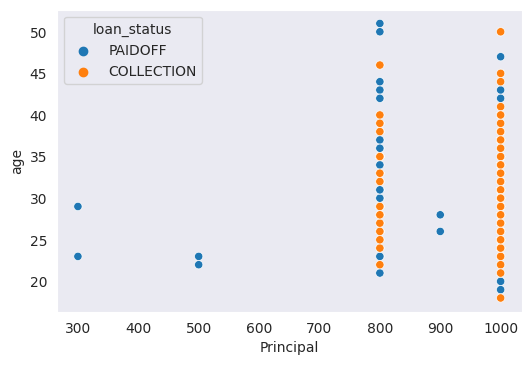

In [ ]:
# Looking at the dataset by visualizing using seaborn
import seaborn as sns

sns.set_style(style='darkgrid',rc = {'axes.grid': False})
plt.figure(dpi = 100)
sns.scatterplot(data = train_df,x = 'Principal',y='age',hue = 'loan_status')
plt.xlabel('Principal')
plt.ylabel('age')
plt.show()

In [ ]:
#separating the labels from the dataframe
train_y = train_df['loan_status']
test_y = test_df['loan_status']

In [ ]:
# changing the dataframe name from train_df to train_X
train_X = train_df
test_X = test_df

In [ ]:
# Remove the columns 'Unamed: 0' and 'Unnamed:0.1' as there won't be any impact on the model
train_X.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1,inplace= True)
test_X.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1,inplace= True)

**Checking the missing values**

In [ ]:
# No missing  values
train_X.isna().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [ ]:
# Describing the data
train_X.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


In [ ]:
# Information about the data : datypes of columns, number of missing values, count columns ,rows
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [ ]:
#Converting the time format from 9/12/2016 to Year-Month-Date

train_X['due_date'] = pd.to_datetime(train_X['due_date'])
train_X['effective_date'] = pd.to_datetime(train_X['effective_date'])
test_X['due_date'] = pd.to_datetime(train_X['due_date'])
test_X['effective_date'] = pd.to_datetime(test_X['effective_date'])

In [ ]:
#Checking the count of paid off and collection in target feature "loan_status"

In [ ]:
train_X['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

#Analysing on which day of a week the majority of persons have taken their loans and their respective status whether the people paid off or not

0      3
1      3
2      3
3      4
4      4
      ..
341    6
342    6
343    0
344    0
345    0
Name: day_of_week, Length: 346, dtype: int64
loan_status  day_of_week
COLLECTION   6               65
             5               14
             4                4
             0                3
PAIDOFF      6              101
             0               84
             2               31
             1               20
             5               17
             4                4
             3                3
Name: day_of_week, dtype: int64


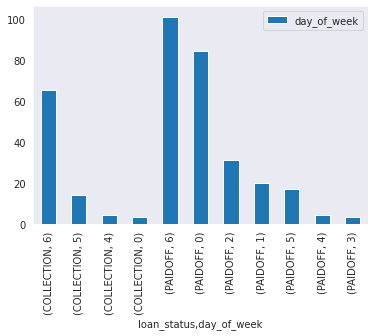

In [ ]:
#Extracting the day of the week from effective_date feature on which day the loan has taken
train_X['day_of_week'] = train_X['effective_date'].dt.dayofweek
print(train_X['day_of_week'])
test_X['day_of_week'] = test_X['effective_date'].dt.dayofweek
group  = train_X.groupby('loan_status')['day_of_week'].value_counts()
print(group)
group = pd.DataFrame(group)
group.plot.bar(stacked = True)


**The above bar plot shows the number of people on which day of a week the loan has taken and status of being paid or not**

In [ ]:
# the no of people taken loans on respective day of a week
train_X['day_of_week'].value_counts()

6    166
0     87
5     31
2     31
1     20
4      8
3      3
Name: day_of_week, dtype: int64

                   Month
loan_status Month       
COLLECTION  10        51
            9         30
            11         5
PAIDOFF     10       130
            9        123
            11         7


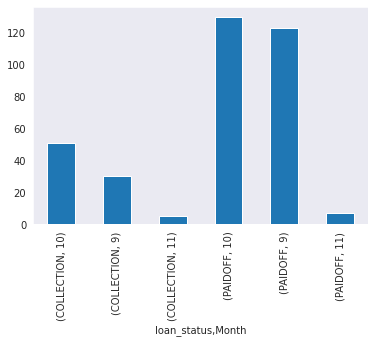

In [ ]:
# This is code creating a separate columns in both test and train dataset of the month on which the number of people has taken loans and their status whether they are paid off or to be collected
train_X['Month'] = train_X.due_date.dt.month
test_X['Month'] = test_X.due_date.dt.month
group = train_X.groupby(['loan_status'])['Month'].value_counts()


print(pd.DataFrame(group))
group.plot.bar(stacked = True)

In [ ]:
#as the observation shows people who ever get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4
train_X['weekend'] = train_X['day_of_week'].apply(lambda x: 1 if (x>3)  else 0)
test_X['weekend'] = test_X['day_of_week'].apply(lambda x: 1 if (x>3) else 0)
train_X.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,Month,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10,1


In [ ]:
train_X.groupby(['Gender'])['loan_status'].value_counts()

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

# Converting categorical data (Gender) to numerical values

In [ ]:
# Converting male to 0 and female to 1 (Endcoding)
train_X['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
train_X.head()
test_X['Gender'].replace(to_replace= ['male','female'],value = [0,1],inplace = True)

****

In [ ]:
# Counting the number of people taken loan by Education
train_X['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

***In the above if you can observe the "Master or Above " count is very less compared to other categories. so, Better remove it as it may not show the impact on the model***

**Encoding the Categorical Data**

In [ ]:

train_X = pd.concat([train_X,pd.get_dummies(train_X['education'])],axis = 1)

train_X.drop(['Master or Above','education','effective_date','due_date','Month'], axis =1 , inplace = True)
train_X.head()


,loan_status,Principal,terms,age,Gender,day_of_week,weekend,Bechalor,High School or Below,college
0,PAIDOFF,1000,30,45,0,3,0,0,1,0
1,PAIDOFF,1000,30,33,1,3,0,1,0,0
2,PAIDOFF,1000,15,27,0,3,0,0,0,1
3,PAIDOFF,1000,30,28,1,4,1,0,0,1
4,PAIDOFF,1000,30,29,0,4,1,0,0,1


**Modifing the test dataframe as train dataframe. Why because we have to test this dataframe on our model which we are going to train on training data**

In [ ]:

test_X = pd.concat([test_X,pd.get_dummies(test_X['education'])],axis = 1)
test_X.drop(['Master or Above','education','effective_date','due_date','Month'], axis =1 , inplace = True)
test_X.head()

,loan_status,Principal,terms,age,Gender,day_of_week,weekend,Bechalor,High School or Below,college
0,PAIDOFF,1000,30,50,1,3,0,1,0,0
1,PAIDOFF,300,7,35,0,4,1,0,0,0
2,PAIDOFF,1000,30,43,1,5,1,0,1,0
3,PAIDOFF,1000,30,26,0,5,1,0,0,1
4,PAIDOFF,800,15,29,0,6,1,1,0,0


In [ ]:
train_y = train_X['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1])
train_X.drop('loan_status',axis = 1,inplace = True)

In [ ]:
test_y = test_X['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1])
test_X.drop('loan_status',axis = 1,inplace = True)

**Pair plot of whole data set, so that we can analyse the dataset and draw some in sights from data and guess which alogrithm can suit our dataset**

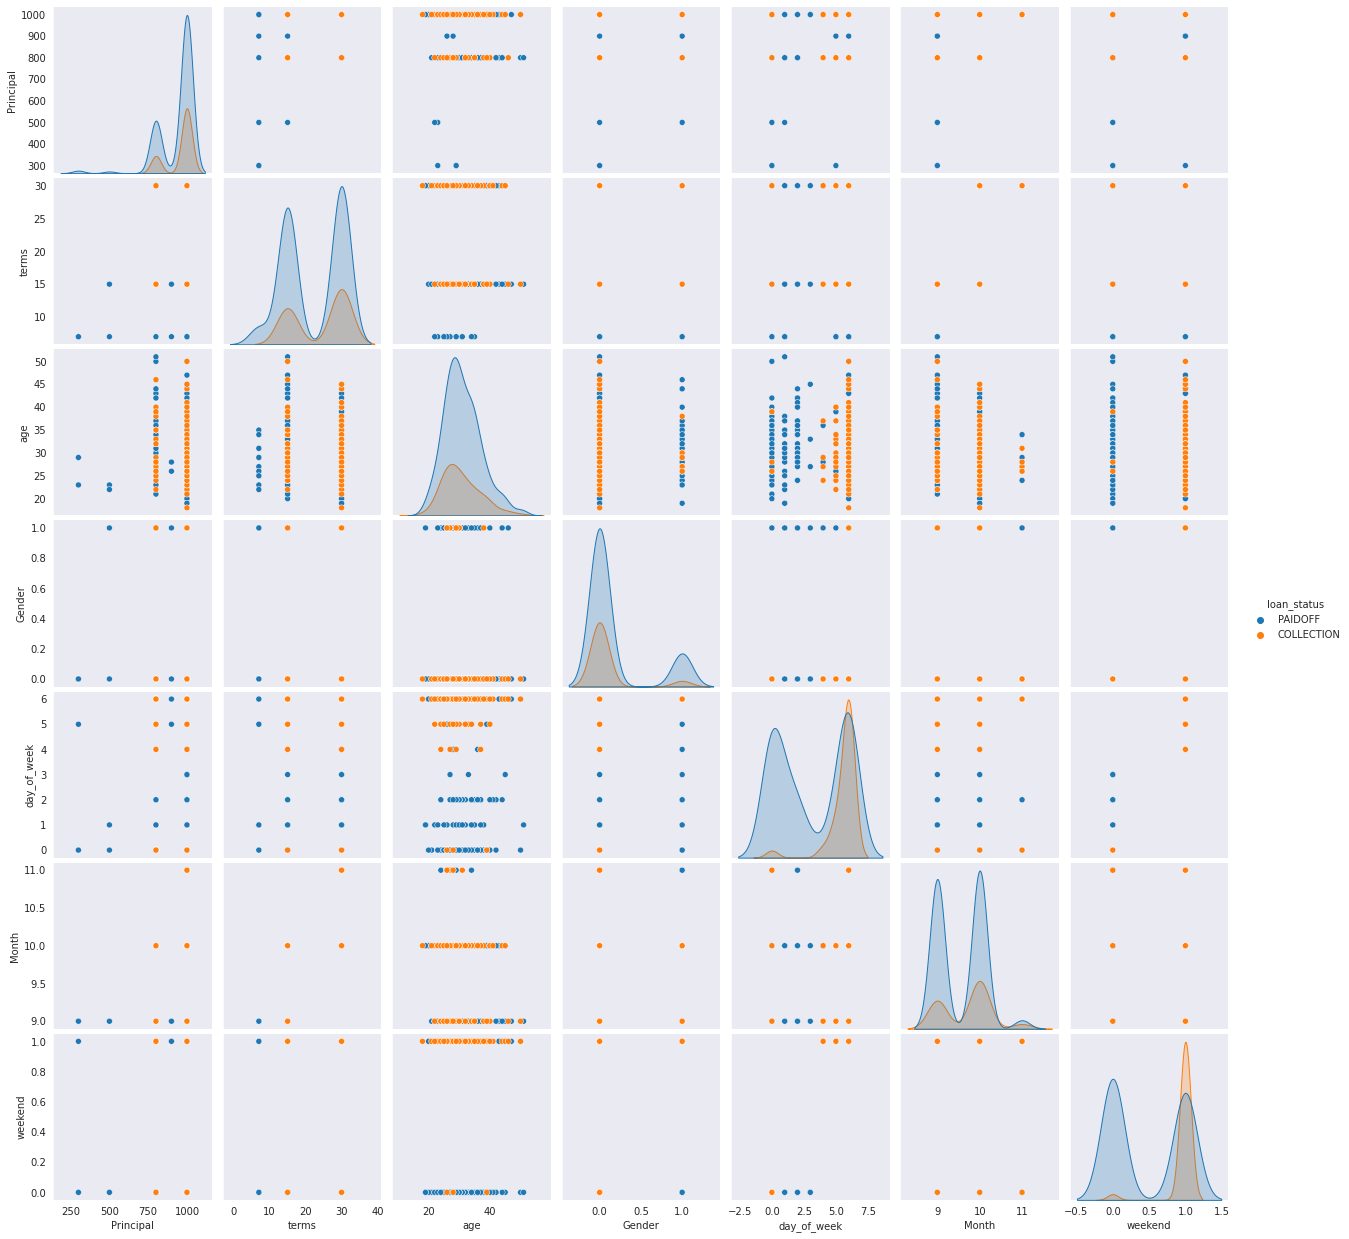

In [ ]:
sns.pairplot(train_df,hue = 'loan_status')

In [ ]:
train_X

,Principal,terms,age,Gender,day_of_week,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,1,3,0,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,0,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...
341,800,15,32,0,6,1,0,1,0
342,1000,30,25,0,6,1,0,1,0
343,800,15,39,0,0,0,0,0,1
344,1000,30,28,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)
train_X=scaler.transform(train_X)

In [ ]:
test_X = scaler.transform(test_X)

In [ ]:
print(train_X.shape)
print(test_X.shape)

(346, 9)
(54, 9)


In [ ]:
train_X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [ ]:
# import scoring methods
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold

## **Training the dataset using the KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_score = 0.0
accuracy_list = []

for k in range(5,20):
  kfold = KFold(n_splits= 10,shuffle= True ,random_state=4)
  classifier = KNeighborsClassifier(n_neighbors = k,algorithm = 'auto')

  scores = cross_val_score(classifier, train_X, train_y, cv=kfold)
  score=scores.mean()
  accuracy_list.append(score)


  if score > best_score:
     best_score=score
     best_clf=classifier
     bestK=k

print("Best K is :",bestK,"| Cross validation Accuracy :",best_score)
classifier=best_clf

Best K is : 8 | Cross validation Accuracy : 0.751344537815126


In [ ]:
classifier.fit(train_X,train_y)
y_predict = classifier.predict(test_X)

In [ ]:
metrics.confusion_matrix(y_true =test_y,y_pred = y_predict)

array([[36,  4],
       [12,  2]])

In [ ]:
test_scores = {}

**Evaluation**

In [ ]:
test_scores['kNN-accuracy'] = metrics.accuracy_score(test_y,y_predict)
test_scores['KNN-f1-score']= metrics.f1_score(test_y, y_predict, average='weighted')

In [ ]:
test_scores

{'KNN-f1-score': 0.6579124579124579, 'kNN-accuracy': 0.7037037037037037}

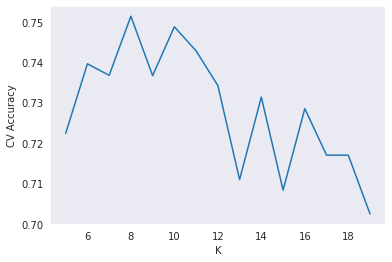

In [ ]:
plt.plot(range(5,20),accuracy_list)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

## **Training the data using Decision Tree**

In [ ]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth= 3)
score = cross_val_score(clf_tree,train_X,train_y,cv = 5)
clf_tree = clf_tree.fit(train_X, train_y)

y_pred=clf_tree.predict(test_X)

In [ ]:
max(score)

0.7536231884057971

[Text(148.8, 190.26, 'X[4] <= -0.07\ngini = 0.374\nsamples = 346\nvalue = [260, 86]'),
 Text(74.4, 135.9, 'X[8] <= 0.14\ngini = 0.042\nsamples = 141\nvalue = [138, 3]'),
 Text(37.2, 81.53999999999999, 'gini = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'X[4] <= -1.219\ngini = 0.1\nsamples = 57\nvalue = [54, 3]'),
 Text(74.4, 27.180000000000007, 'gini = 0.165\nsamples = 33\nvalue = [30, 3]'),
 Text(148.8, 27.180000000000007, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(223.20000000000002, 135.9, 'X[1] <= -1.46\ngini = 0.482\nsamples = 205\nvalue = [122, 83]'),
 Text(186.0, 81.53999999999999, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(260.40000000000003, 81.53999999999999, 'X[3] <= 0.979\ngini = 0.487\nsamples = 198\nvalue = [115, 83]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.493\nsamples = 173\nvalue = [97, 76]'),
 Text(297.6, 27.180000000000007, 'gini = 0.403\nsamples = 25\nvalue = [18, 7]')]

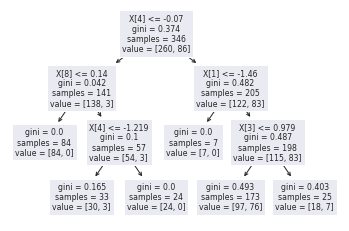

In [ ]:
# plotting the tree

tree.plot_tree(clf_tree)

**Evaluation**

In [ ]:
test_scores['Tree-accuracy'] = metrics.accuracy_score(test_y,y_pred)
test_scores['Tree-f1-score']=metrics.f1_score(test_y, y_pred, average='weighted')

In [ ]:
test_scores

{'KNN-f1-score': 0.6579124579124579,
 'Tree-accuracy': 0.7407407407407407,
 'Tree-f1-score': 0.6304176516942475,
 'kNN-accuracy': 0.7037037037037037}

# **Support Vector Machine algorithm**

In [ ]:
from sklearn.svm import SVC
folds = KFold(n_splits = 10, shuffle = True, random_state = 4)
clf_svc = SVC(C=1)
cv_result = cross_val_score(clf_svc,train_X,train_y,cv = 10)


In [ ]:
cv_result.mean()


0.723109243697479

In [ ]:
clf_svc.fit(train_X,train_y)
y_pred = clf_svc.predict(test_X)

In [ ]:

test_scores['SVM-f1-score']=metrics.f1_score(test_y, y_pred, average='weighted')
test_scores['SVM-accuracy'] = metrics.accuracy_score(test_y,y_pred)

In [ ]:
test_scores

{'KNN-f1-score': 0.6579124579124579,
 'SVM-accuracy': 0.7222222222222222,
 'SVM-f1-score': 0.6212664277180406,
 'Tree-accuracy': 0.7407407407407407,
 'Tree-f1-score': 0.6304176516942475,
 'kNN-accuracy': 0.7037037037037037}

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=0, solver='saga')
clf_log.fit(train_X,train_y)

y_pred=clf_log.predict(test_X)


In [ ]:

test_scores['LogRef-accuracy'] = metrics.accuracy_score(test_y,y_pred)
test_scores['LogReg-f1-score']=metrics.f1_score(test_y, y_pred, average='weighted')
test_scores['LogReg-logLoss']=metrics.log_loss(test_y, y_pred)

**These are the test scores of the model**

In [ ]:
test_scores

{'KNN-f1-score': 0.6579124579124579,
 'LogRef-accuracy': 0.7592592592592593,
 'LogReg-f1-score': 0.6717642373556352,
 'LogReg-logLoss': 8.31489061358961,
 'SVM-accuracy': 0.7222222222222222,
 'SVM-f1-score': 0.6212664277180406,
 'Tree-accuracy': 0.7407407407407407,
 'Tree-f1-score': 0.6304176516942475,
 'kNN-accuracy': 0.7037037037037037}

**The Accuracy in every model is on an average of 75%. The accuracy may increase in the increase of the training dataset.**

# **Randomized Search CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
pipeline = Pipeline(steps = [
                             ('scaler',StandardScaler()),

                             ('estimator',LogisticRegression())])

In [ ]:
param_distribution =  [{
                        'estimator':[LogisticRegression()],

                        },
                       {
                        'estimator': [KNeighborsClassifier( n_neighbors= 10)],

                        },
                       {
                        'estimator': [SVC(C =1)]},
                       {
                        'estimator': [tree.DecisionTreeClassifier(max_depth= 3)]
                       }]


In [ ]:
random_search_cv = RandomizedSearchCV(pipeline,param_distribution,refit=True,cv = 5)
random_search_cv.fit(train_X,train_y)
print(random_search_cv.best_params_)

{'estimator': KNeighborsClassifier(n_neighbors=10)}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
random_search_cv.best_score_

0.7196273291925465

In [ ]:
pred_y = random_search_cv.best_estimator_.predict(test_X)

In [ ]:
metrics.accuracy_score(test_y,pred_y)


0.7222222222222222

Every time we run the cell of randomizedsearch the accuracy changes because it takes the random param distribution

**The best model accuracy the given RanddomizedSearch is 72%**

#                                                          **Thank you!**